# Assignment 6
Name:-Pravin Jain
Roll No:-74
import the libraries and load the Sales_data_sample dataset, trimming it to the chosen columns and dropping rows with missing data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('sales_data_sample.csv')
print(df.shape) # (344, 9)
df = df[['ORDERNUMBER', 'PRICEEACH']]
df = df.dropna(axis=0)

(2823, 25)


In [5]:
#The Elbow method to have an indication of clusters for our data.t consists in the interpretation of a line plot with an elbow shape. The number of clusters is were the elbow bends. The x axis of the plot is the number of clusters and the y axis is the Within Clusters Sum of Squares (WCSS) for each number of clusters:

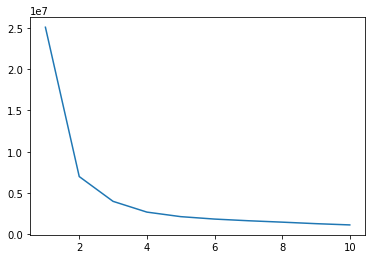

In [6]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

In [ ]:
#The elbow method indicates our data has 2 clusters.  Let's plot the data before and after clustering:

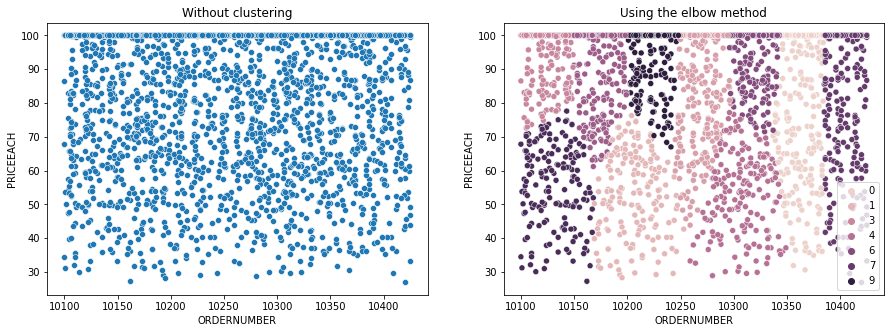

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='ORDERNUMBER', y='PRICEEACH').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='ORDERNUMBER', y='PRICEEACH', hue=clustering.labels_).set_title('Using the elbow method');

In [10]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2823.0,10258.725115,92.085478,10100.00,10180.00,10262.0,10333.5,10425.0
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0


In [ ]:
#The mean is far from the standard deviation (std), this indicates high variance. Let's try to reduce it by scaling the data with Standard Scaler:

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled = ss.fit_transform(df)

In [ ]:
#let's repeat the Elbow method process for the scaled data:

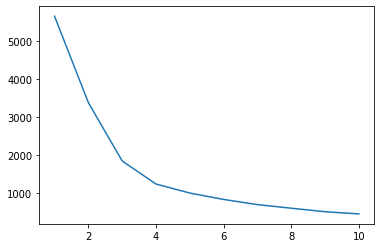

In [12]:
wcss_sc = []

for i in range(1, 11):
    clustering_sc = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering_sc.fit(scaled)
    wcss_sc.append(clustering_sc.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss_sc);